# Run basic evaluation based on validation output

## Import packages

In [11]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns
import sns as sns

## Load data from all frames

In [2]:
file_list = [f for f in listdir("validation_output") if isfile(join("validation_output", f))]
dfs = []
for i in range(len(file_list)):
    fname = "validation_output/" + file_list[i]
    df_temp = pd.read_csv(fname)
    df_temp["src"] = file_list[i].replace(".csv", "")
    dfs.append(df_temp)
df = pd.concat(dfs)

## Plots
### Average accuracy per round / comparison

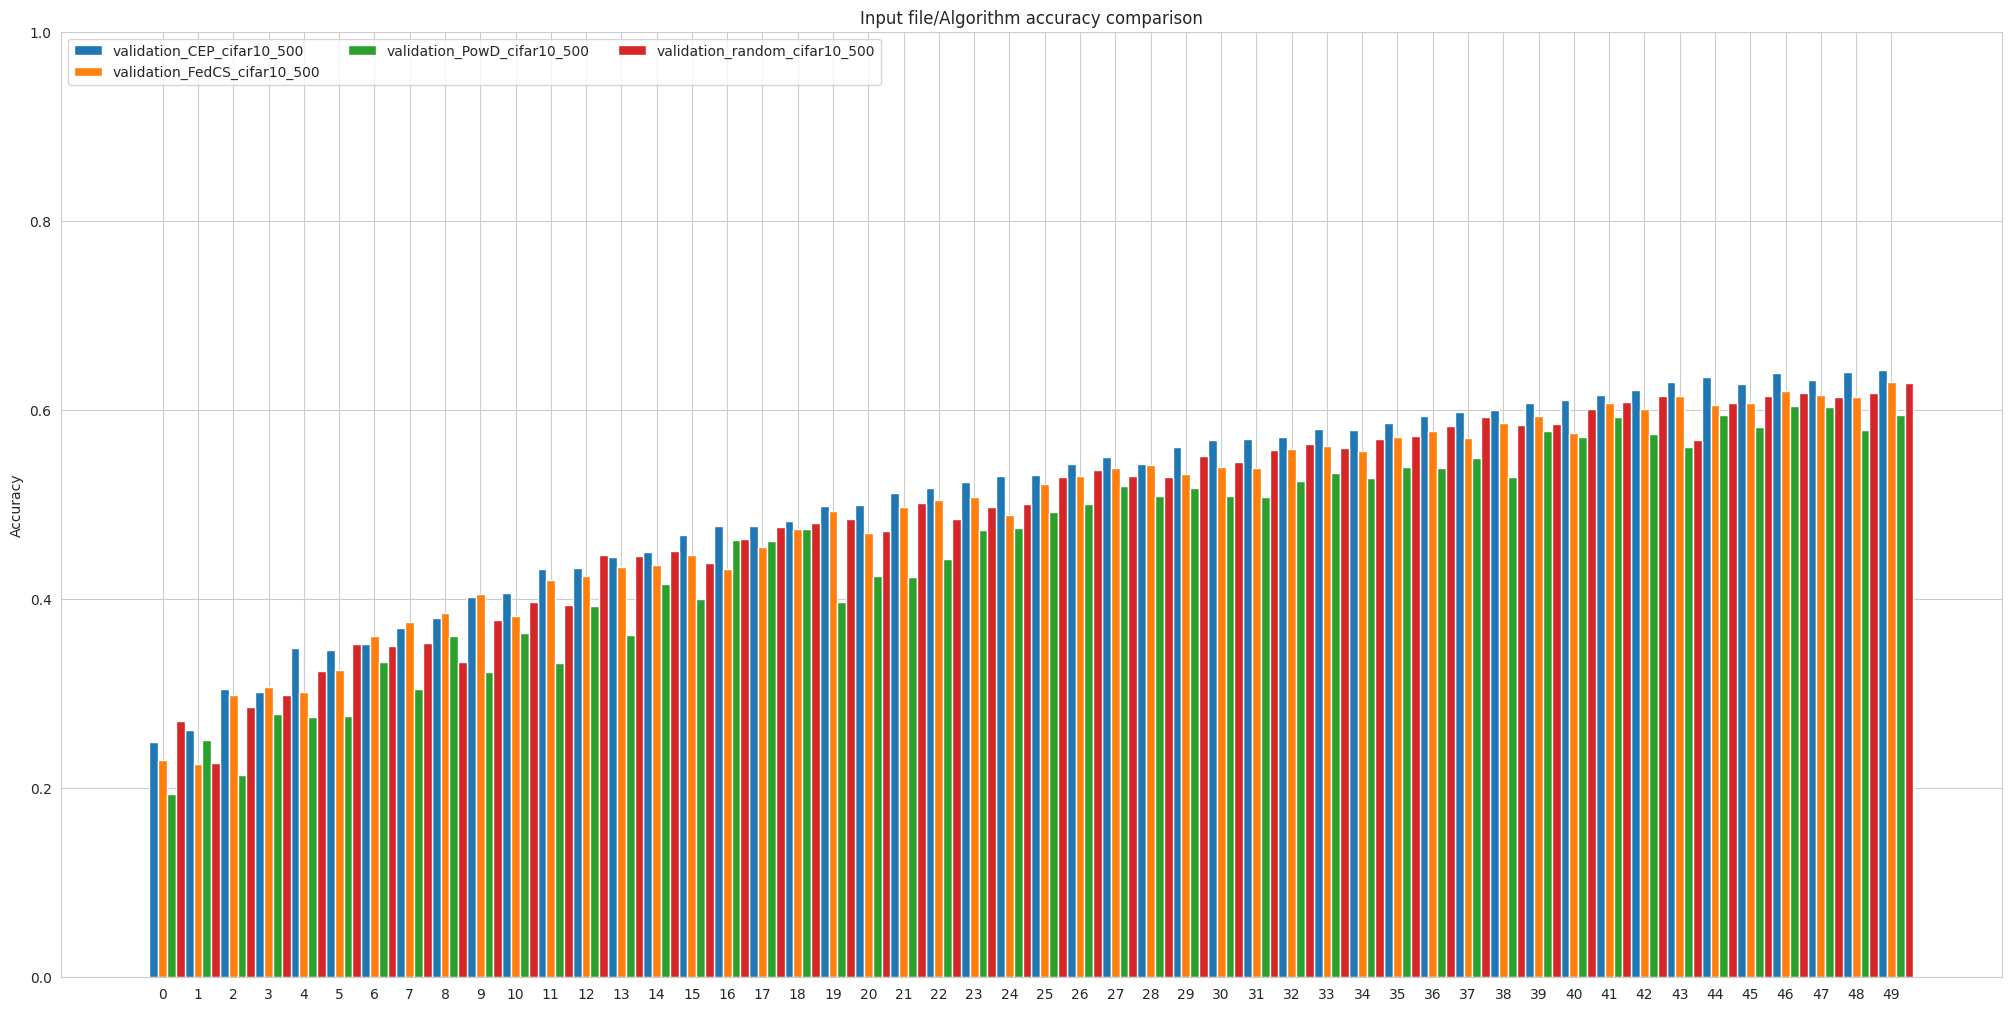

In [7]:
df_plot = df[['round', 'acc', 'src']].groupby(['src', 'round']).mean().reset_index()
rounds = df_plot['round'].unique()
res_dict = {}
for i in df_plot['src'].unique():
    res_dict[i] = df_plot[df_plot['src'] == i]['acc']
    if len (res_dict[i]) < len(rounds):
        res_dict[i] = np.append(res_dict[i], np.repeat(np.nan, len(rounds) - len(res_dict[i])))
x = np.arange(len(rounds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(20,10))

for attribute, measurement in res_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Input file/Algorithm accuracy comparison')
ax.set_xticks(x + width, rounds)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

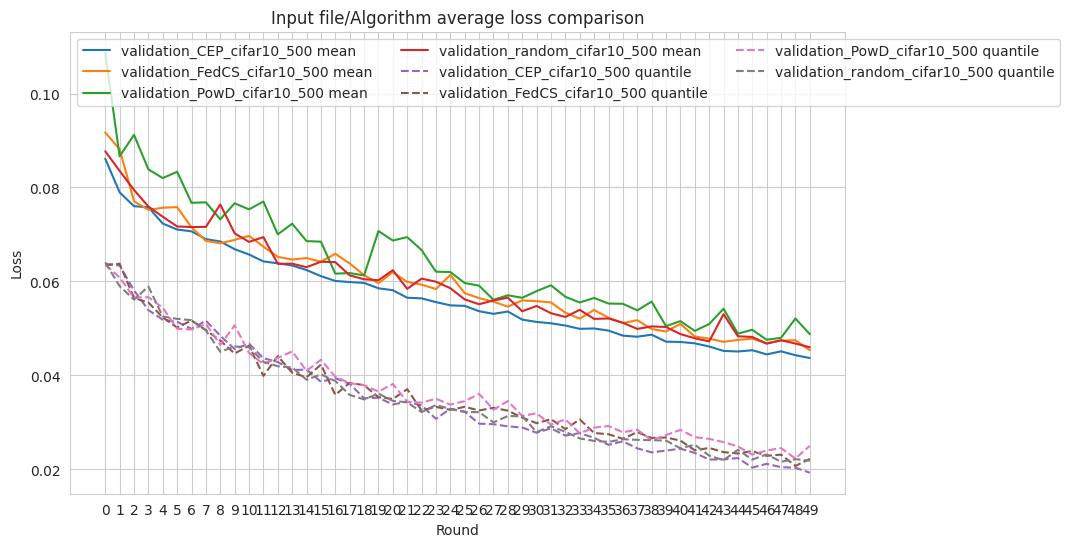

In [4]:
df_plot = df[['round', 'loss', 'src']].groupby(['src', 'round']).mean().reset_index()
df_plot_quantiles = df[['round', 'loss', 'src']].groupby(['src', 'round']).quantile(.01).reset_index()
rounds = df_plot['round'].unique()
mean_dict = {}
quantile_dict = {}
for i in df_plot['src'].unique():
    mean_dict[i+' mean'] = df_plot[df_plot['src'] == i]['loss']
    quantile_dict[i+' quantile'] = df_plot_quantiles[df_plot_quantiles['src'] == i]['loss']
x = np.arange(len(rounds))  # the label locations
plt.figure(figsize=(10,6))
for key, value in mean_dict.items():
    plt.plot(rounds, value, label=key)
for key, value in quantile_dict.items():
    plt.plot(rounds, value, label=key, linestyle='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.z
plt.ylabel('Loss')
plt.title('Input file/Algorithm average loss comparison')
plt.xticks(rounds)
plt.xlabel('Round')
plt.legend(loc='upper left', ncols=3)

plt.show()

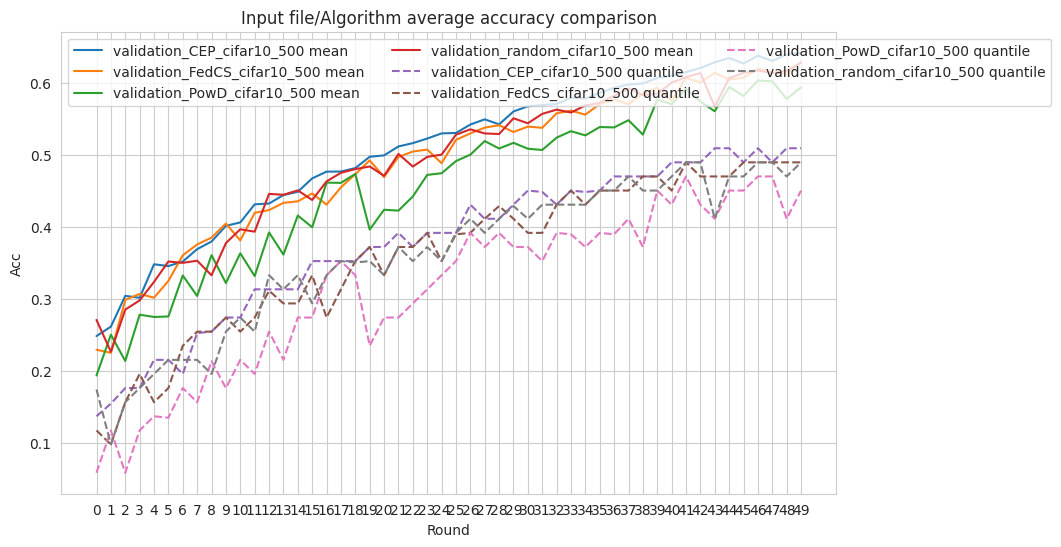

In [23]:
df_plot = df[['round', 'acc', 'src']].groupby(['src', 'round']).mean().reset_index()
df_plot_quantiles = df[['round', 'acc', 'src']].groupby(['src', 'round']).quantile(.1).reset_index()
rounds = df_plot['round'].unique()
mean_dict = {}
quantile_dict = {}
for i in df_plot['src'].unique():
    mean_dict[i+' mean'] = df_plot[df_plot['src'] == i]['acc']
    quantile_dict[i+' quantile'] = df_plot_quantiles[df_plot_quantiles['src'] == i]['acc']
x = np.arange(len(rounds))  # the label locations
plt.figure( figsize=(10,6))
for key, value in mean_dict.items():
    plt.plot(rounds, value, label=key)
for key, value in quantile_dict.items():
    plt.plot(rounds, value, label=key, linestyle='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.z
plt.ylabel('Acc')
plt.title('Input file/Algorithm average accuracy comparison')
plt.xticks(rounds)
plt.xlabel('Round')
plt.legend(loc='upper left', ncols=3)

plt.show()

In [29]:
df_plot = df[df['round'] == max(df['round'])][['acc', 'src', 'client']]

array([[<Axes: title={'center': 'acc'}>]], dtype=object)

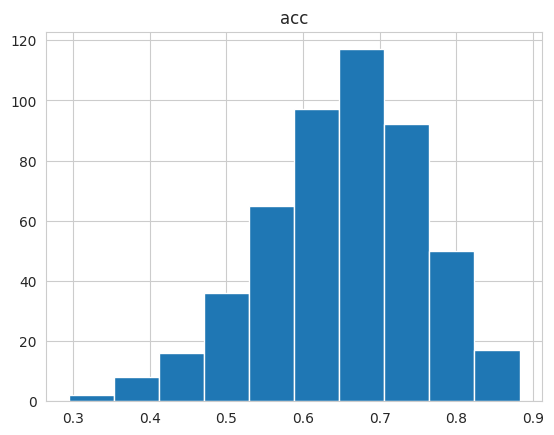

In [32]:
df_plot[df_plot['src'] == 'validation_CEP_cifar10_500'].hist()

array([[<Axes: title={'center': 'acc'}>]], dtype=object)

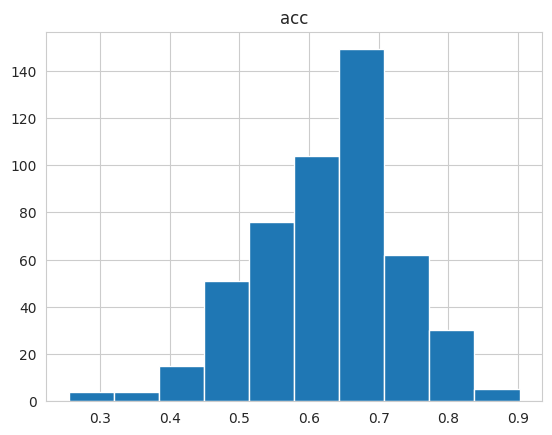

In [34]:
df_plot[df_plot['src'] == 'validation_random_cifar10_500'].hist()


In [40]:
df_plot[df_plot['src'] == 'validation_FedCS_cifar10_500']

,acc,src,client
24500,0.725490,validation_FedCS_cifar10_500,angry-player
24501,0.627451,validation_FedCS_cifar10_500,direct-player
24502,0.725490,validation_FedCS_cifar10_500,lazy-curve
24503,0.745098,validation_FedCS_cifar10_500,exact-column
24504,0.686275,validation_FedCS_cifar10_500,mute-assurance
...,...,...,...
24995,0.490196,validation_FedCS_cifar10_500,poky-lard
24996,0.431373,validation_FedCS_cifar10_500,elaborate-napalm
24997,0.607843,validation_FedCS_cifar10_500,flashed-trainer
24998,0.647059,validation_FedCS_cifar10_500,inflammable-axel


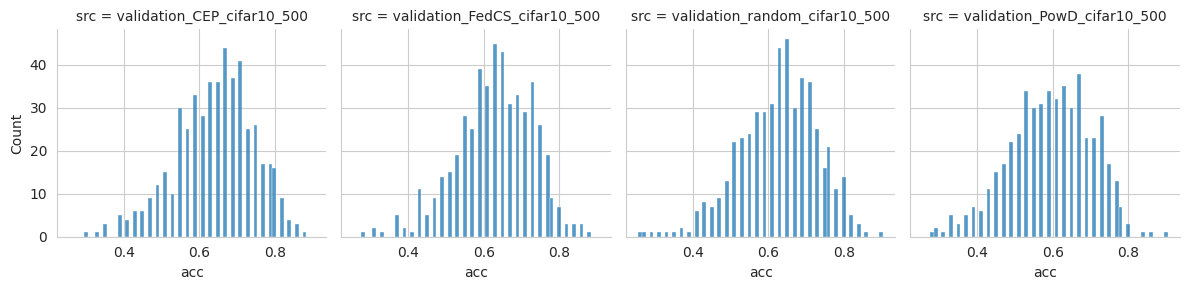

In [48]:
df_plot = df[df['round'] == max(df['round'])][['acc', 'src', 'client']]
g = sns.FacetGrid(df_plot, col="src")
g.map(sns.histplot, "acc", bins=10, binwidth=0.01)

In [69]:
df_plot = df[df['round'] == max(df['round'])][['acc', 'src', 'client']]
df_plot_quantiles = df_plot.groupby(['client','src']).min().reset_index()
df_plot_quantiles

,client,src,acc
0,active-molding,validation_CEP_cifar10_500,0.705882
1,active-molding,validation_FedCS_cifar10_500,0.588235
2,active-molding,validation_PowD_cifar10_500,0.607843
3,active-molding,validation_random_cifar10_500,0.686275
4,adiabatic-rate,validation_CEP_cifar10_500,0.705882
...,...,...,...
1995,worn-fork,validation_random_cifar10_500,0.431373
1996,worn-liason,validation_CEP_cifar10_500,0.568627
1997,worn-liason,validation_FedCS_cifar10_500,0.647059
1998,worn-liason,validation_PowD_cifar10_500,0.607843


<Axes: xlabel='acc', ylabel='src'>

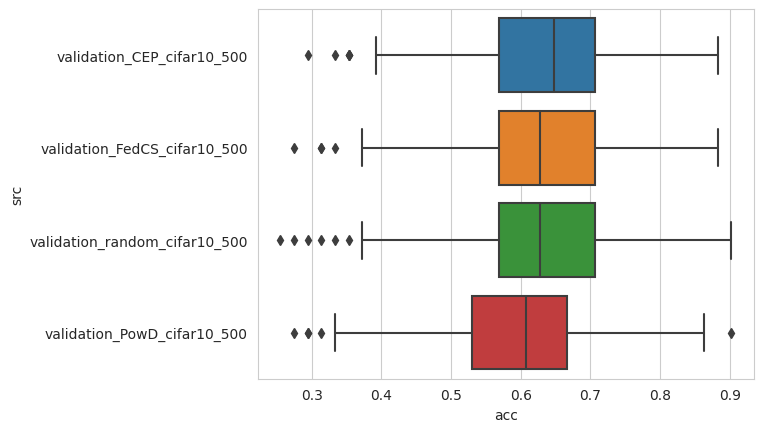

In [66]:
sns.boxplot(df_plot, x='acc', y='src')

<Axes: xlabel='acc', ylabel='src'>

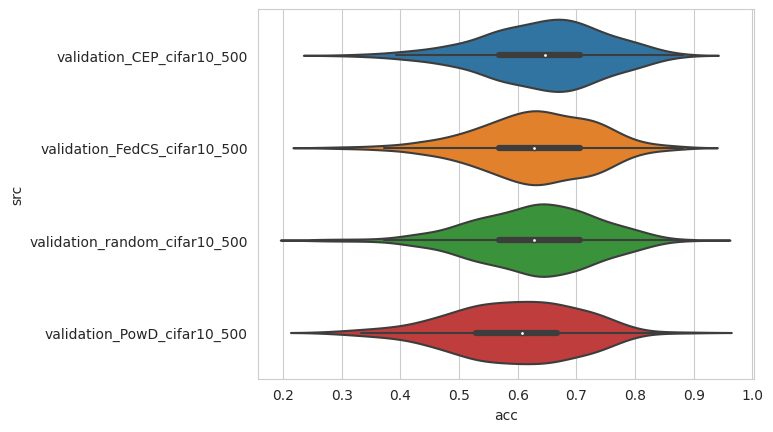

In [67]:
sns.violinplot(df_plot, x='acc', y='src')

In [60]:
np.quantile(df_plot[df_plot['src'] == 'validation_FedCS_cifar10_500']['acc'], 0.9)

0.7450980392156863

In [42]:
df_plot

,acc,src,client
24500,0.705882,validation_CEP_cifar10_500,angry-player
24501,0.686275,validation_CEP_cifar10_500,direct-player
24502,0.666667,validation_CEP_cifar10_500,lazy-curve
24503,0.764706,validation_CEP_cifar10_500,exact-column
24504,0.705882,validation_CEP_cifar10_500,mute-assurance
...,...,...,...
24995,0.450980,validation_PowD_cifar10_500,poky-lard
24996,0.333333,validation_PowD_cifar10_500,elaborate-napalm
24997,0.666667,validation_PowD_cifar10_500,flashed-trainer
24998,0.568627,validation_PowD_cifar10_500,inflammable-axel
